### Import required library

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset and do pre-processing

In [84]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [85]:
df=df[['v1','v2']]

In [86]:
df.loc[0,'v2']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [87]:
df[df['v1']=='spam']['v2'].iloc[100]

'To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT'

In [88]:
df.shape

(5572, 2)

### Generate word cloud to check which word occured more time

In [89]:
from wordcloud import WordCloud

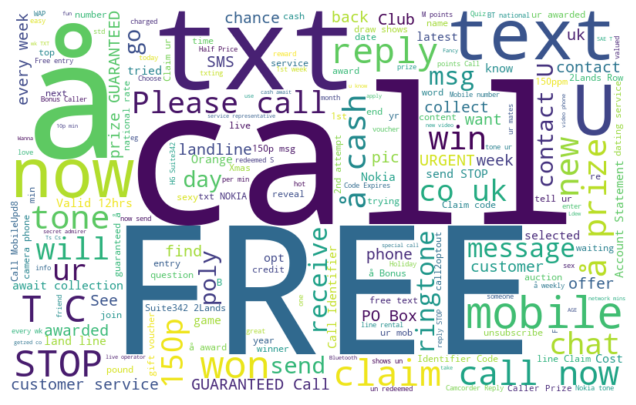

In [90]:
# WORD CLOUD FOR SPAM WORDS

wordcloud = WordCloud(background_color='white', width=800, height=500).generate(''.join(df[df['v1']=='spam']['v2']))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

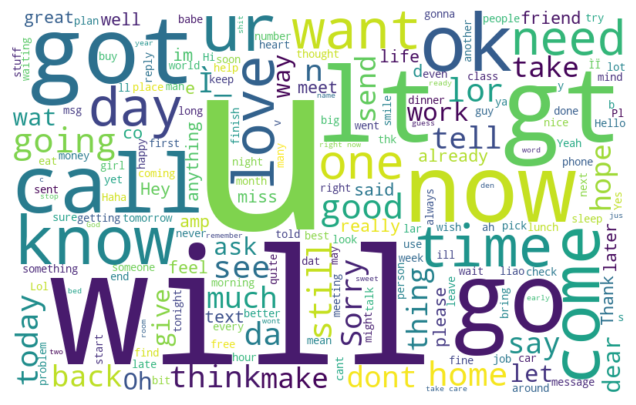

In [91]:
# WORD CLOUD FOR NOT SPAM WORDS
wordcloud = WordCloud(background_color='white', width=800, height=500).generate(''.join(df[df['v1']=='ham']['v2']))

plt.figure(figsize=(20, 5));
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off");

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import re,string

In [93]:
def removePunctuation(sent):
    return re.sub(r'[{}]'.format(string.punctuation),'',sent)
def removeNumbers(sent):
    return re.sub(r'\d+',"",sent)

In [94]:
df['v2']=df['v2'].apply(lambda x:removePunctuation(x))
df['v2']=df['v2'].apply(removeNumbers)

In [95]:
X=df['v2']
y=df['v1']

In [96]:
y=y.map({'ham':0,'spam':1}) #ham:0 spam:1

In [97]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [98]:
max_words = 1000
max_len = 150

In [99]:
token = Tokenizer(num_words=max_words)
token.fit_on_texts(X)
words = token.texts_to_sequences(X)
word_matrix = sequence.pad_sequences(words,maxlen=max_len)

In [100]:
X=word_matrix

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [103]:
from tensorflow.keras.layers import LSTM,Dropout,Dense,Embedding,Input

In [104]:
from tensorflow.keras.models import Sequential

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

In [106]:
early_stop=EarlyStopping(patience=2)

In [107]:
embed_dim=16

### Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [108]:
model=Sequential()

model.add(Input(shape=[max_len]))

model.add(Embedding(max_words,embed_dim,input_length = max_len))
 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1,activation='sigmoid'))

#Compile the Model

model.compile(optimizer = 'adam', metrics = 'accuracy',loss='binary_crossentropy')

In [109]:
X_train

array([[  0,   0,   0, ..., 324,  22, 314],
       [  0,   0,   0, ...,   9,   4, 209],
       [  0,   0,   0, ..., 616, 309,   1],
       ...,
       [  0,   0,   0, ...,   0, 292,  22],
       [  0,   0,   0, ..., 705,   2, 239],
       [  0,   0,   0, ...,   8, 279, 296]])

### Fit the Model

In [110]:
model.fit(x=X_train,y=y_train,epochs=20,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/20
140/140 [==============================] - 26s 150ms/step - loss: 0.2800 - accuracy: 0.9094 - val_loss: 0.1057 - val_accuracy: 0.9722
Epoch 2/20
140/140 [==============================] - 20s 141ms/step - loss: 0.0731 - accuracy: 0.9798 - val_loss: 0.0888 - val_accuracy: 0.9767
Epoch 3/20
140/140 [==============================] - 18s 132ms/step - loss: 0.0482 - accuracy: 0.9859 - val_loss: 0.0917 - val_accuracy: 0.9713
Epoch 4/20
140/140 [==============================] - 18s 131ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.1008 - val_accuracy: 0.9695


### Save the model

In [116]:
model.save('spam_classification.h5')

### Test the model

In [112]:
acc = model.evaluate(X_test,y_test)

35/35 [==============================] - 2s 43ms/step - loss: 0.1008 - accuracy: 0.9695


In [115]:
print("Accuarcy Score :",acc[1]*100)

Accuarcy Score : 96.95067405700684
